In [1]:
import pandas as pd
from pathlib import Path
import imageio
from compress_pickle import dump, load

animal = 'DK62'
section = '001'
input_file = Path(f'/net/birdstore/Active_Atlas_Data/cell_segmentation/{animal}/CH3/{section}/', f'extracted_cells_{int(section)}_threshold_2000.pkl')
print(f'reading: {input_file}')
obj = pd.read_pickle(input_file)
try:
    print(f'ORG EXTRACTED CELLS CELL CANDIDATE COUNT: {len(obj[0])}')
except:
    print('NOT AVAILABLE')

# section = '001'
input_file1 = Path(f'/scratch/pipeline/{animal}/cell_candidates/', f'extracted_cells_{section}.gz')
print(f'reading: {input_file1}')
obj1 = load(input_file1)
try:
    print(f'NEW EXTRACTED CELLS CELL CANDIDATE COUNT: {len(obj1[0])}')
except:
    print('NOT AVAILABLE')

reading: /net/birdstore/Active_Atlas_Data/cell_segmentation/DK62/CH3/001/extracted_cells_1_threshold_2000.pkl
ORG EXTRACTED CELLS CELL CANDIDATE COUNT: 26
reading: /scratch/pipeline/DK62/cell_candidates/extracted_cells_001.gz
NEW EXTRACTED CELLS CELL CANDIDATE COUNT: 496


In [5]:
len(obj1[0])

496

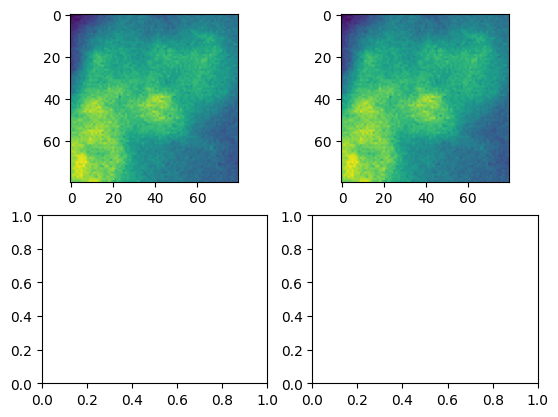

In [58]:
#VIEW CONTENTS OF ARRAY (IMAGES)
import numpy as np
import matplotlib.pyplot as plt

# obj1

#ORG IMAGE:
org_img3 = obj[0][0]['image_CH3']
new_img3 = obj1[0][18]["image_CH3"]
# print(f'Numpy array shape of org. image_CH3: {org_img3.shape}')
# print(f'Numpy array shape of new image_CH3: {obj1[0][0]["image_CH3"].shape}')

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(org_img3)
axarr[0,1].imshow(new_img3)

# org_img1 = obj[0][0]['image_CH1']
# print(f'Numpy array of org. image_CH1: {org_img1.shape.shape}')
# print(f'Numpy array of new image_CH1: {obj1[0][0]["image_CH1"].shape}')

# print(f'Segment mask: {obj1[0][0]["mask"].shape}')
# obj1[0][0]['mask']

In [60]:
for i in range(len(obj1[0])):
    print(f'{i}, Coord: {obj1[0][i]["absolute_coordinates_YX"]}, ({obj[0][i]["row"]+obj[0][i]["origin"][0]}, {obj[0][i]["col"]})')

0, Coord: (17827, 36614), (17798, 36655)
1, Coord: (17820, 36616), (17797, 36658)
2, Coord: (17829, 36619), (17799, 36657)
3, Coord: (17820, 36619), (17800, 36626)
4, Coord: (17840, 36620), (17801, 36651)
5, Coord: (17814, 36622), (17803, 36624)
6, Coord: (17838, 36626), (17802, 36628)
7, Coord: (17841, 36622), (17804, 36628)
8, Coord: (17842, 36624), (17804, 36654)
9, Coord: (17803, 36624), (17813, 36627)
10, Coord: (17813, 36627), (17814, 36622)
11, Coord: (17817, 36624), (17817, 36624)
12, Coord: (17800, 36626), (17819, 36631)
13, Coord: (17802, 36628), (17820, 36616)
14, Coord: (17804, 36628), (17820, 36619)
15, Coord: (17819, 36631), (17829, 36619)
16, Coord: (17830, 36632), (17827, 36614)
17, Coord: (17801, 36651), (17830, 36632)
18, Coord: (17798, 36655), (17838, 36626)
19, Coord: (17804, 36654), (17840, 36620)
20, Coord: (17799, 36657), (17841, 36622)
21, Coord: (17797, 36658), (17842, 36624)
22, Coord: (20907, 37079), (20871, 37115)
23, Coord: (20900, 37083), (20885, 37085)
24

/tmp/ipykernel_1563610/2733740361.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(2,2)


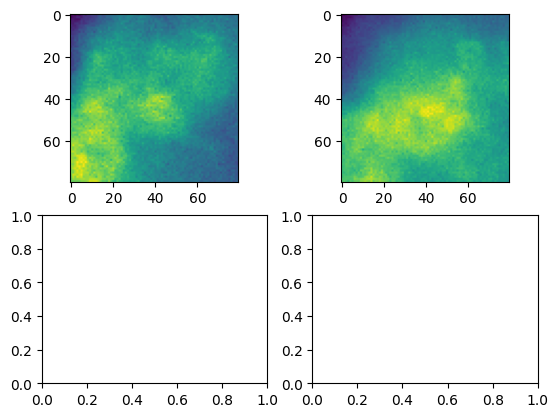

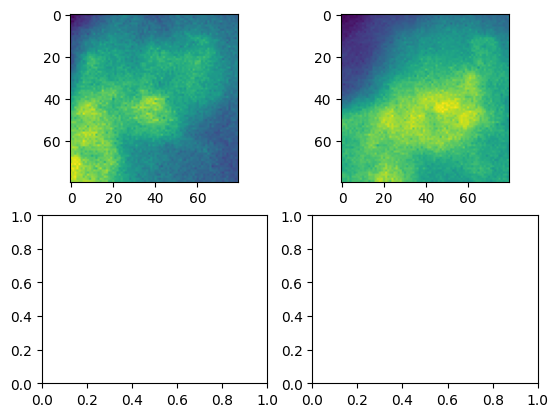

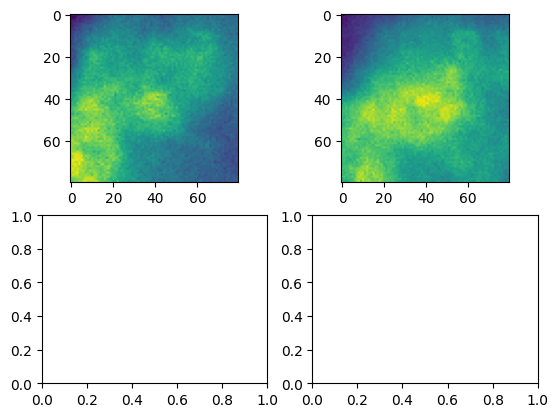

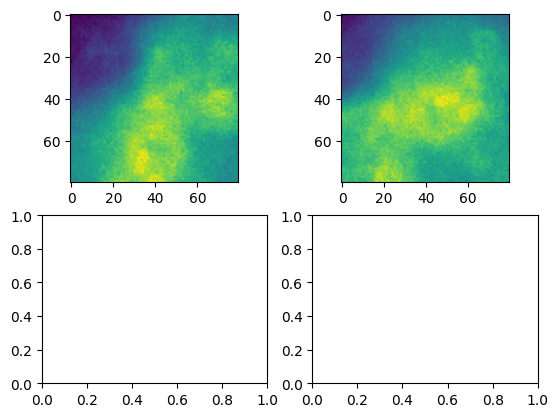

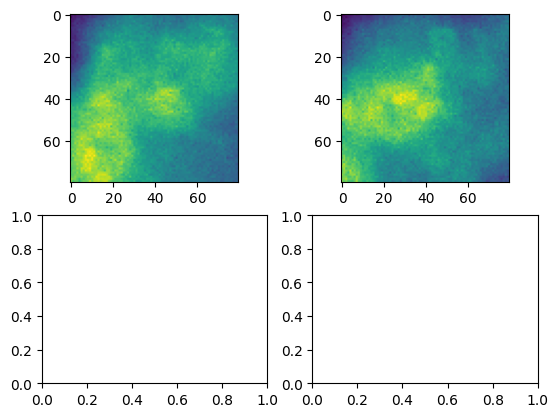

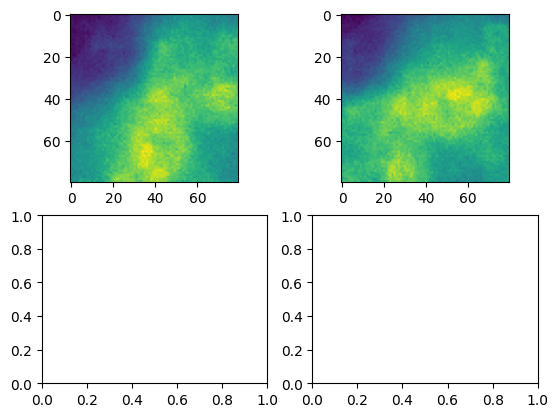

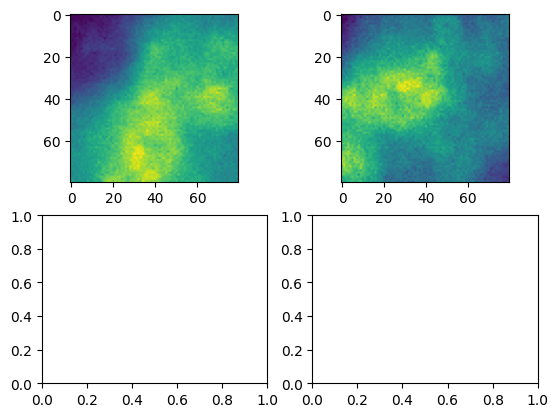

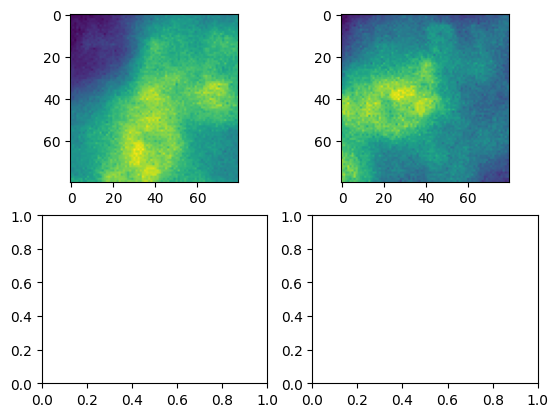

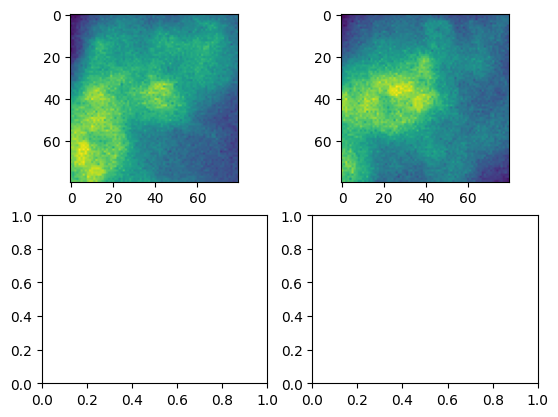

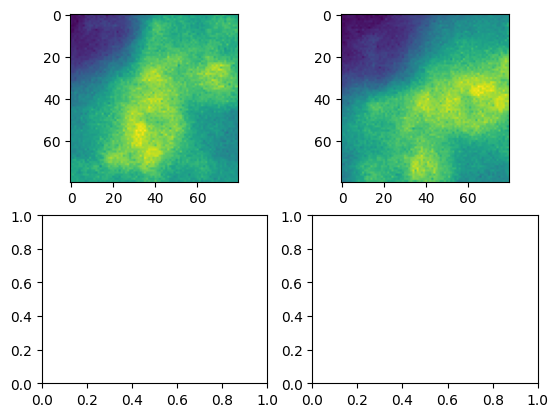

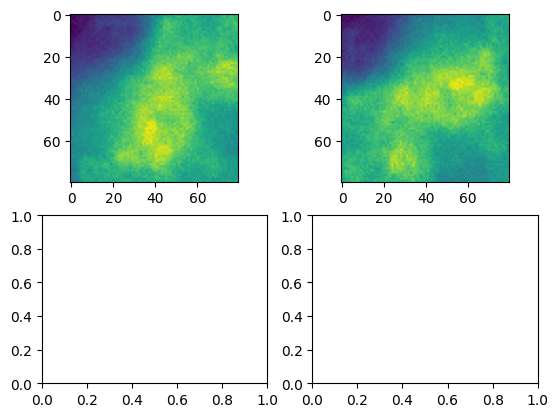

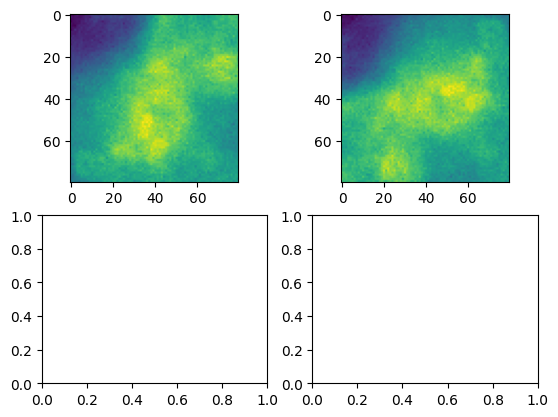

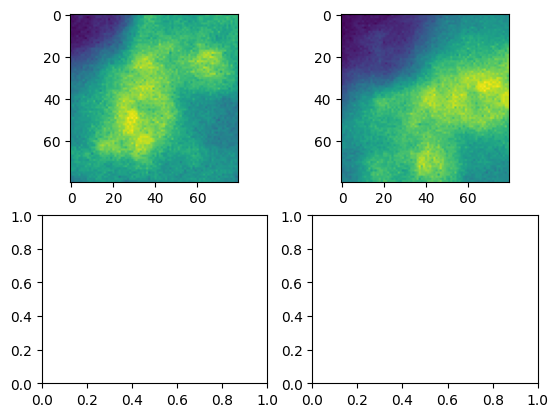

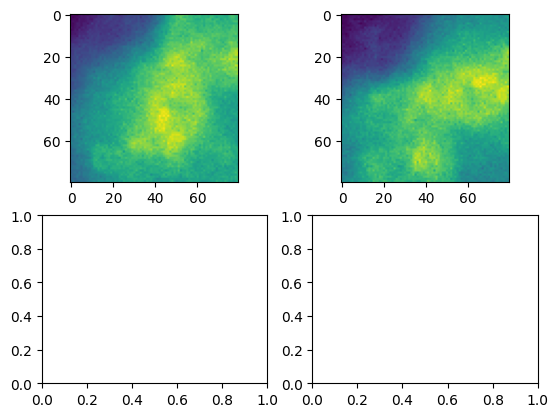

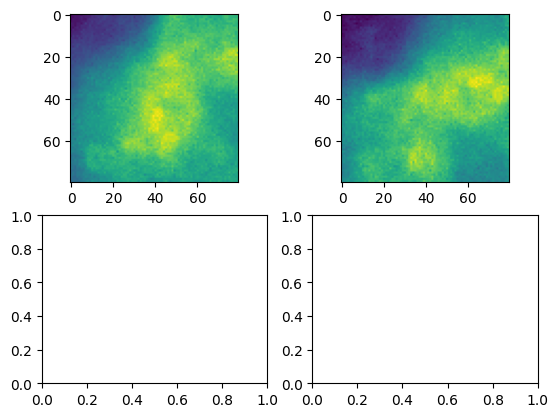

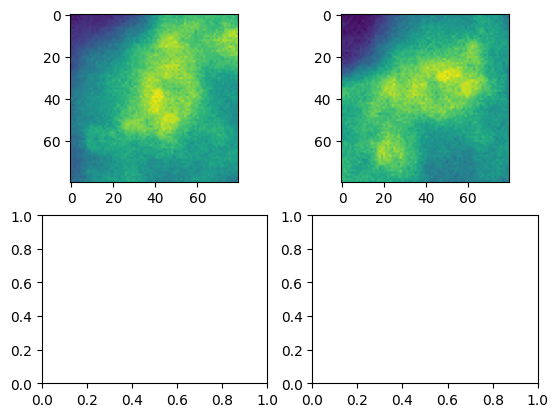

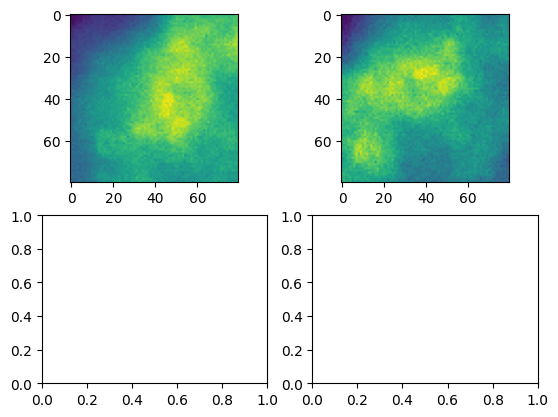

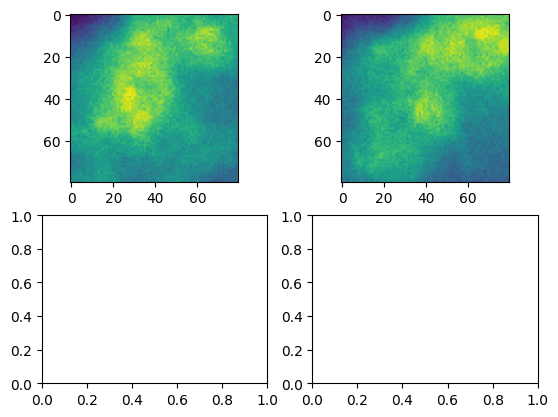

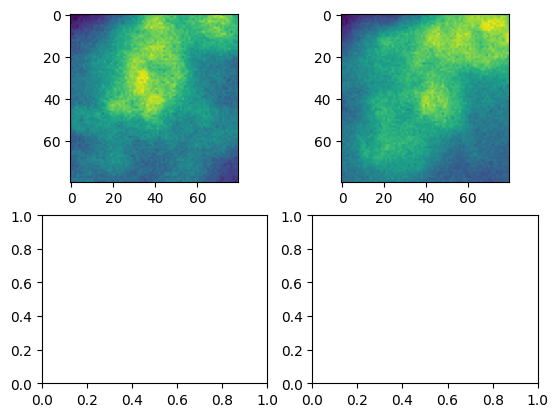

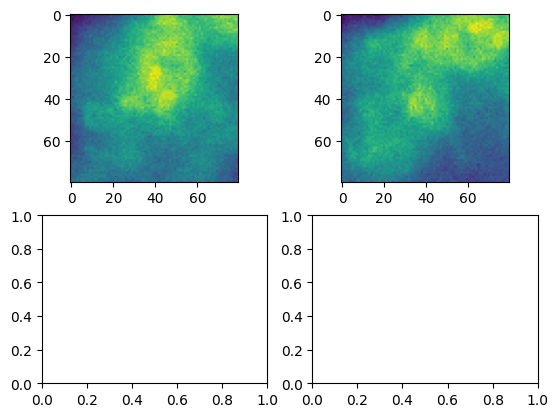

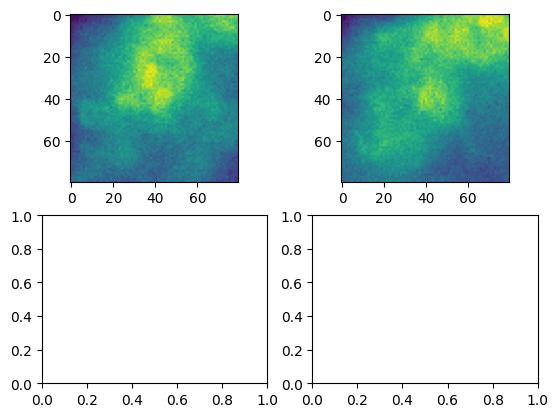

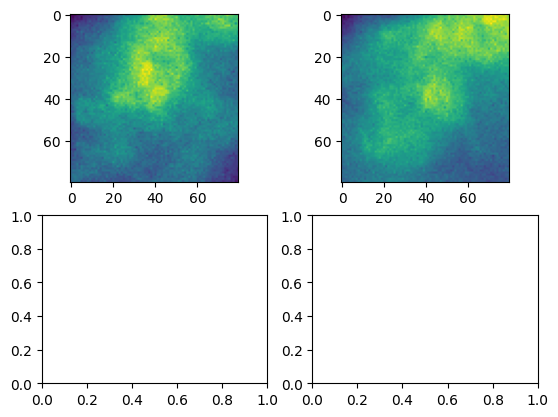

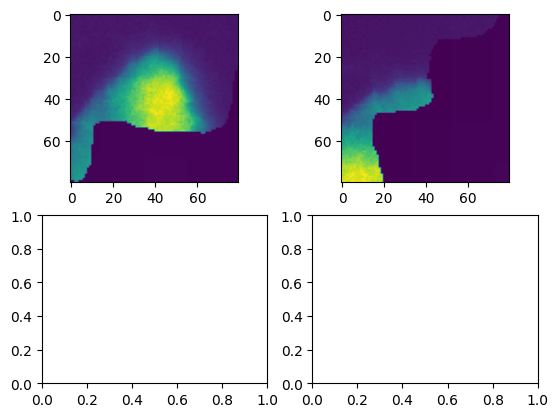

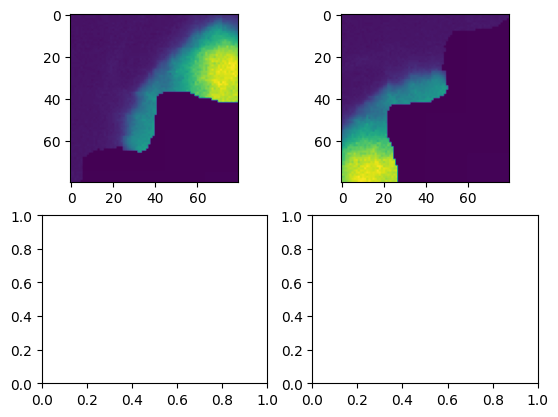

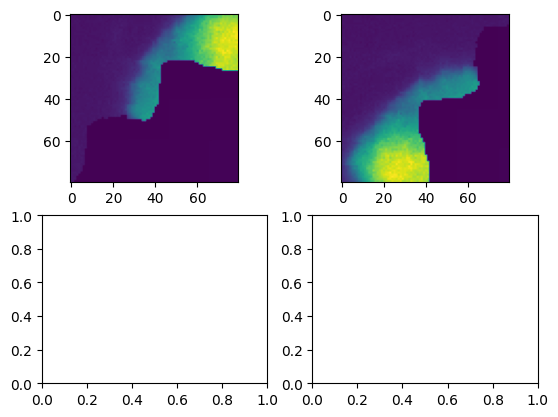

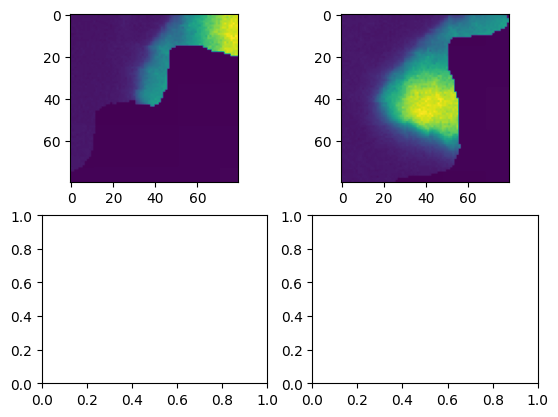

In [33]:
#len(obj[0])
#len(obj1[0])

#EACH IMAGE (CHANNEL 3) IS LOCATED IN obj1[0][X]['image_CH3'])
for cell_candidate_image_index in range(len(obj[0])):
    org_img3 = obj[0][cell_candidate_image_index]['image_CH3']
    new_img3 = obj1[0][cell_candidate_image_index]["image_CH3"]
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(org_img3)
    axarr[0,1].imshow(new_img3)
# org_img3 = obj[0][0]['image_CH3']
# new_img3 = obj1[0][0]["image_CH3"]

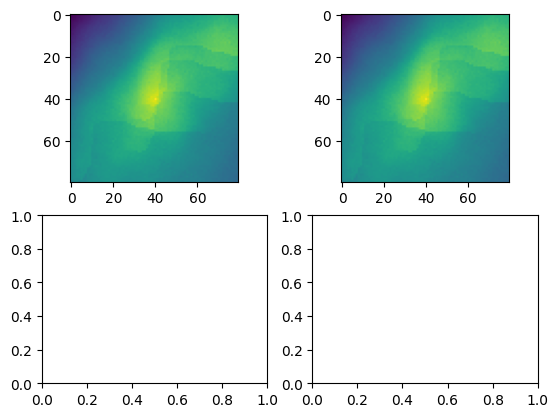

In [61]:
#CALCULATE AVERAGE OF CELL IMAGES (PART OF FEATURE FINDER)
org_images = []
new_images = []
for cell_candidate_image_index in range(len(obj[0])):
    org_img3 = obj[0][cell_candidate_image_index]['image_CH3']
    new_img3 = obj1[0][cell_candidate_image_index]["image_CH3"]
    # f, axarr = plt.subplots(2,2)
    # axarr[0,0].imshow(org_img3)
    # axarr[0,1].imshow(new_img3)
    new_images.append(new_img3)
    org_images.append(org_img3)

org_images_stack = np.stack(org_images)
new_images_stack = np.stack(new_images)

org_average = np.average(org_images_stack,axis=0)
new_average = np.average(new_images_stack,axis=0)

org_average = (org_average - org_average.mean())/org_average.std()
new_average = (new_average - new_average.mean())/new_average.std()
# print(f'DEBUG: org_average.shape: {org_average.shape}')
# print(f'DEBUG: new_average.shape: {new_average.shape}')
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(org_average)
axarr[0,1].imshow(new_average)